In [1]:
# Importing the Keras libraries and packages
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
import os
import random
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
import splitfolders 

In [2]:
# Part 1 - Develop a Baseline CNN Model

# A baseline model will show us a minimal model performance 
# to which other models will be compared


img_rows = 128
img_cols = 128
epochs = 35
batch_size = 64
num_of_train_samples = 3360
num_of_test_samples = 1440

In [3]:
# plot diagnostic learning curves
def graph_accuracy_loss(history):
    pyplot.figure(figsize=(10,5))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='blue', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('\nClassification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='blue', label='test')
    pyplot.legend()
    # save plot to file
#     filename = sys.argv[0].split('/')[-1]
#     pyplot.savefig(filename + '_plot.png')
#     pyplot.close()
    pyplot.show()

In [4]:
# Function that calculates Confusion Matrix and shows Classification Report
def class_report(test_set, model):
    Y_pred = model.predict(test_set, num_of_test_samples // batch_size + 1)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_set.classes, y_pred))
    print('Classification Report')
    target_names = list(training_set.class_indices.keys())
    print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [6]:
# Import and work with splitfolders 
#link - https://pypi.org/project/split-folders/

# Divide all artists folders to train and val folders
splitfolders.ratio("./artists", output="./", seed=42 , ratio=(.7, .3))

Copying files: 4800 files [00:04, 968.16 files/s] 


In [7]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255)

training_set = datagen.flow_from_directory('train', 
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [8]:
print(test_set.class_indices)

{'Matisse': 0, 'Monet': 1, 'Pissaro': 2, 'Renoir': 3, 'Sargent': 4, 'VanGogh': 5}


In [9]:
# VGG Blocks
# The basic building block of classic CNNs is a sequence of the following: 
#     (i) a convolutional layer with padding to maintain the resolution, 
#     (ii) a nonlinearity such as a ReLU, 
#     (iii) a pooling layer such as a max pooling layer. 
# One VGG block consists of a sequence of convolutional layers, 
# followed by a max pooling layer for spatial downsampling. 
# In the original VGG paper [Simonyan & Zisserman, 2014], the authors employed convolutions with  3×3  kernels 
# with padding of 1 (keeping height and width) 
# and  2×2  max pooling with stride of 2 (halving the resolution after each block). 

<h3>Baseline model with 1 VGG block without dropout</h3>


In [10]:
# Define CNN model with one VGG-style block
# The 1-block VGG model has a single convolutional layer with 32 filters 
# followed by a max pooling layer
def baseline_model_1():
    #reset_random_seeds()
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# The model will be fit for 35 epochs - to check model's accuracy
# Define model
model = baseline_model_1()
# Fit model
history = model.fit_generator(training_set, 
                              steps_per_epoch=len(training_set), # = num_of_train_samples // batch_size +1
                              validation_data=test_set, 
                              validation_steps=len(test_set), # = num_of_test_samples // batch_size +1
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 74s 1s/step - loss: 1.9967 - accuracy: 0.2219 - val_loss: 1.6657 - val_accuracy: 0.3076
Epoch 2/35
53/53 [==============================] - 56s 1s/step - loss: 1.5780 - accuracy: 0.3796 - val_loss: 1.4520 - val_accuracy: 0.4535
Epoch 3/35
53/53 [==============================] - 56s 1s/step - loss: 1.4486 - accuracy: 0.4522 - val_loss: 1.4351 - val_accuracy: 0.4556
Epoch 4/35
53/53 [==============================] - 56s 1s/step - loss: 1.3848 - accuracy: 0.4798 - val_loss: 1.3873 - val_accuracy: 0.4653
Epoch 5/35
53/53 [==============================] - 58s 1s/step - loss: 1.2973 - accuracy: 0.5251 - val_loss: 1.3587 - val_accuracy: 0.4847
Epoch 6/35
53/53 [==============================] - 56s 1s/step - loss: 1.2096 - accuracy: 0.5822 - val_loss: 1.3505 - val_accuracy: 0.4938
Epoch 7/35
53/53 [==============================] - 54s 1s/step - loss: 1.1968 - accuracy: 0.5805 - val_loss: 1.3719 - val_accuracy: 0.4708
Epoch 8/35
53/53 [==

In [12]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 51.1806


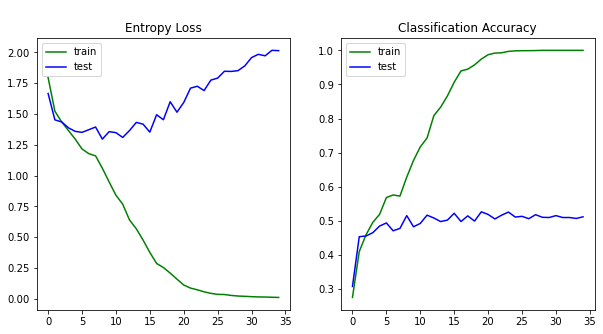

In [13]:
# Build graphs
graph_accuracy_loss(history)

In [14]:
class_report(test_set, model)

Confusion Matrix
[[109  37  15  32  21  26]
 [ 16 129  40   8  11  36]
 [ 12  33 134  24  11  26]
 [ 17  14  20 139  22  28]
 [ 38  19  20  33 110  20]
 [ 18  22  36  31  17 116]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.52      0.45      0.48       240
       Monet       0.51      0.54      0.52       240
     Pissaro       0.51      0.56      0.53       240
      Renoir       0.52      0.58      0.55       240
     Sargent       0.57      0.46      0.51       240
     VanGogh       0.46      0.48      0.47       240

    accuracy                           0.51      1440
   macro avg       0.51      0.51      0.51      1440
weighted avg       0.51      0.51      0.51      1440



In [ ]:
# As we see our 1-vgg block model is over-fitting on a training set

<h3>Baseline model with 2 VGG blocks without dropout</h3>


In [17]:
# Define CNN model with two VGG-style blocks
def baseline_model_2():
   # reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                     input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# The model will be fit for 30 epochs 
# define model
model = baseline_model_2()
# fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 25)

Epoch 1/25
53/53 [==============================] - 95s 2s/step - loss: 1.8804 - accuracy: 0.2391 - val_loss: 1.5255 - val_accuracy: 0.4465
Epoch 2/25
53/53 [==============================] - 93s 2s/step - loss: 1.4949 - accuracy: 0.4416 - val_loss: 1.5273 - val_accuracy: 0.3806
Epoch 3/25
53/53 [==============================] - 94s 2s/step - loss: 1.4085 - accuracy: 0.4545 - val_loss: 1.3900 - val_accuracy: 0.4938
Epoch 4/25
53/53 [==============================] - 94s 2s/step - loss: 1.3073 - accuracy: 0.5134 - val_loss: 1.3347 - val_accuracy: 0.4944
Epoch 5/25
53/53 [==============================] - 92s 2s/step - loss: 1.1953 - accuracy: 0.5544 - val_loss: 1.3934 - val_accuracy: 0.5201
Epoch 6/25
53/53 [==============================] - 93s 2s/step - loss: 1.1147 - accuracy: 0.5967 - val_loss: 1.2434 - val_accuracy: 0.5465
Epoch 7/25
53/53 [==============================] - 92s 2s/step - loss: 0.9786 - accuracy: 0.6673 - val_loss: 1.3812 - val_accuracy: 0.4646
Epoch 8/25
53/53 [==

In [19]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 54.5139


In [20]:
class_report(test_set, model)

Confusion Matrix
[[147   8  15  30  19  21]
 [ 23 121  45  16  16  19]
 [ 24  17 157  18   8  16]
 [ 32   9  20 139  24  16]
 [ 54   7  26  29 112  12]
 [ 27  10  49  25  20 109]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.48      0.61      0.54       240
       Monet       0.70      0.50      0.59       240
     Pissaro       0.50      0.65      0.57       240
      Renoir       0.54      0.58      0.56       240
     Sargent       0.56      0.47      0.51       240
     VanGogh       0.56      0.45      0.50       240

    accuracy                           0.55      1440
   macro avg       0.56      0.55      0.54      1440
weighted avg       0.56      0.55      0.54      1440



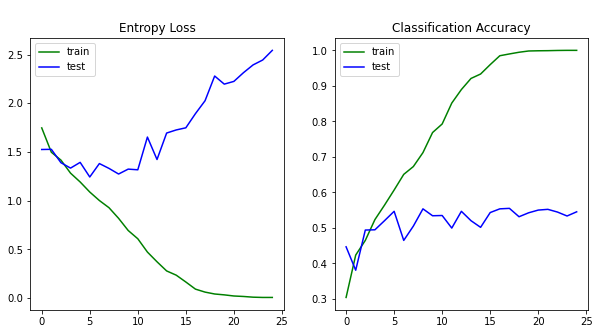

In [21]:
# Build graphs
graph_accuracy_loss(histvory)

In [ ]:
# As we see our 2-vgg block model is over-fitting on a training set as well

<h3>Baseline model with 3 VGG blocks without dropout</h3>


In [22]:
# Define CNN model with three VGG-style blocks
def baseline_model_3():
    #reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
# 3d block
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_3()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 25)

Epoch 1/25
53/53 [==============================] - 120s 2s/step - loss: 1.8064 - accuracy: 0.2054 - val_loss: 1.6606 - val_accuracy: 0.3118
Epoch 2/25
53/53 [==============================] - 121s 2s/step - loss: 1.5919 - accuracy: 0.3569 - val_loss: 1.5015 - val_accuracy: 0.4056
Epoch 3/25
53/53 [==============================] - 119s 2s/step - loss: 1.4809 - accuracy: 0.4258 - val_loss: 1.3783 - val_accuracy: 0.4646
Epoch 4/25
53/53 [==============================] - 119s 2s/step - loss: 1.3954 - accuracy: 0.4787 - val_loss: 1.3719 - val_accuracy: 0.4819
Epoch 5/25
53/53 [==============================] - 119s 2s/step - loss: 1.2992 - accuracy: 0.5075 - val_loss: 1.3322 - val_accuracy: 0.4958
Epoch 6/25
53/53 [==============================] - 117s 2s/step - loss: 1.2359 - accuracy: 0.5437 - val_loss: 1.4353 - val_accuracy: 0.4549
Epoch 7/25
53/53 [==============================] - 119s 2s/step - loss: 1.3134 - accuracy: 0.5079 - val_loss: 1.3522 - val_accuracy: 0.4958
Epoch 8/25
53

In [24]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 55.3472


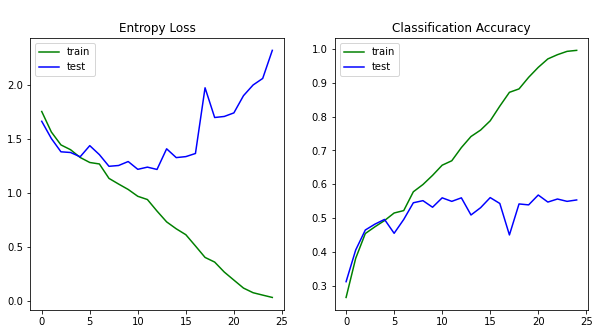

In [25]:
# Build graphs
graph_accuracy_loss(history)

In [26]:
class_report(test_set, model)

Confusion Matrix
[[151  16  12  32  15  14]
 [ 17 148  25  14   8  28]
 [ 23  26 120  22   5  44]
 [ 19  13   9 167  11  21]
 [ 41  19  12  58  88  22]
 [ 24  25  29  29  10 123]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.55      0.63      0.59       240
       Monet       0.60      0.62      0.61       240
     Pissaro       0.58      0.50      0.54       240
      Renoir       0.52      0.70      0.59       240
     Sargent       0.64      0.37      0.47       240
     VanGogh       0.49      0.51      0.50       240

    accuracy                           0.55      1440
   macro avg       0.56      0.55      0.55      1440
weighted avg       0.56      0.55      0.55      1440



In [ ]:
# Accuracy score for 3 VGG blocks is higher than for 2 vgg blcoks model, 
# so we will continiue with it.
# We still have an over-fitting so let's add dropout normalization

In [27]:
# Part 2 - Add Dropout Regularization and Data Augmentation
# to our Baseline model step by step and evaluate an efficiency  
# ___________________________________________________________


# 1 step - Add Dropout

<h3>Model with 3 VGG blocks with dropout</h3>

In [30]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255)

training_set = datagen.flow_from_directory('train', target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('val',target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [31]:
# Define CNN model with Dropout Regularization
def model_with_dropout():
    #reset_random_seeds()
    model = Sequential()
   
    # 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
# 3d block
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
# The model will be fit for 35 epochs 
# Define model
model_d = model_with_dropout()
# Fit model
history = model_d.fit_generator(training_set, steps_per_epoch=len(training_set),
                                validation_data=test_set,
                                validation_steps=len(test_set), 
                                epochs= epochs)

Epoch 1/35
53/53 [==============================] - 348s 7s/step - loss: 1.8507 - accuracy: 0.1889 - val_loss: 1.7113 - val_accuracy: 0.3646
Epoch 2/35
53/53 [==============================] - 340s 6s/step - loss: 1.6987 - accuracy: 0.2956 - val_loss: 1.6176 - val_accuracy: 0.3486
Epoch 3/35
53/53 [==============================] - 337s 6s/step - loss: 1.6184 - accuracy: 0.3427 - val_loss: 1.5370 - val_accuracy: 0.3931
Epoch 4/35
53/53 [==============================] - 350s 7s/step - loss: 1.5762 - accuracy: 0.3765 - val_loss: 1.4161 - val_accuracy: 0.4882
Epoch 5/35
53/53 [==============================] - 350s 7s/step - loss: 1.5232 - accuracy: 0.4055 - val_loss: 1.3951 - val_accuracy: 0.5083
Epoch 6/35
53/53 [==============================] - 349s 7s/step - loss: 1.4690 - accuracy: 0.4293 - val_loss: 1.3404 - val_accuracy: 0.5208
Epoch 7/35
53/53 [==============================] - 344s 6s/step - loss: 1.4106 - accuracy: 0.4595 - val_loss: 1.3374 - val_accuracy: 0.5326
Epoch 8/35
53

In [33]:
# Evaluate model
_, acc = model_d.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 60.0694


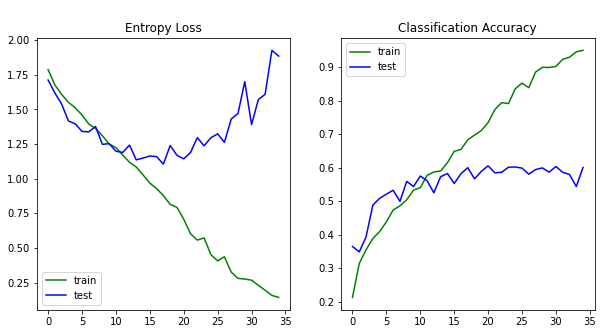

In [34]:
# Build graphs
graph_accuracy_loss(history)

In [35]:
# As we see model overfitts less after usage of dropout

In [36]:
class_report(test_set, model_d)

Confusion Matrix
[[178   7   8  10  24  13]
 [ 19 144  33   9  19  16]
 [ 16  28 142  19  14  21]
 [ 21  17  22 145  23  12]
 [ 50   8   9  25 138  10]
 [ 21  24  36  13  28 118]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.58      0.74      0.65       240
       Monet       0.63      0.60      0.62       240
     Pissaro       0.57      0.59      0.58       240
      Renoir       0.66      0.60      0.63       240
     Sargent       0.56      0.57      0.57       240
     VanGogh       0.62      0.49      0.55       240

    accuracy                           0.60      1440
   macro avg       0.60      0.60      0.60      1440
weighted avg       0.60      0.60      0.60      1440



In [37]:
# 2 step - Add Data augmentation
# Use our model with dropout

<h3>Model with 3 VGG blocks with dropout and data augmentation</h3>


<h4>Trained for max 85 epochs with dropout and data augmentation (with Early Stopping and saving the best model)</h4>


In [38]:
# Implementing Early stoping and checkpoint to save the model with the highest accuracy
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
MC = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, 
                     save_weights_only=False, mode='auto')

In [39]:
# Version with different data augmentation to check accuracy

# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model50 = model_with_dropout()
# Fit model
history = model50.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 85, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/85
53/53 [==============================] - 329s 6s/step - loss: 2.4224 - accuracy: 0.1648 - val_loss: 1.7454 - val_accuracy: 0.3014

Epoch 00001: val_accuracy improved from -inf to 0.30139, saving model to best_model.h5
Epoch 2/85
53/53 [==============================] - 329s 6s/step - loss: 1.7453 - accuracy: 0.2321 - val_loss: 1.6721 - val_accuracy: 0.3299

Epoch 00002: val_accuracy improved from 0.30139 to 0.32986, saving model to best_model.h5
Epoch 3/85
53/53 [==============================] - 327s 6s/step - loss: 1.7158 - accuracy: 0.2717 - val_loss: 1.6765 - val_accuracy: 0.2986

Epoch 00003: val_accuracy did not improve from 0.32986
Epoch 4/85
53/53 [==============================] - 330s 6s/step - loss: 1.6965 - accuracy: 0.2736 - val_loss: 1.6452 - val_accuracy: 0.3479

Epoch 00004: val_accuracy improved from 0.32986 to 0.34792, saving model to best_model.h5
Epoch 5/85
53/53 [========


Epoch 00038: val_accuracy improved from 0.58750 to 0.59444, saving model to best_model.h5
Epoch 39/85
53/53 [==============================] - 329s 6s/step - loss: 1.1161 - accuracy: 0.5802 - val_loss: 1.1438 - val_accuracy: 0.5799

Epoch 00039: val_accuracy did not improve from 0.59444
Epoch 40/85
53/53 [==============================] - 327s 6s/step - loss: 1.1443 - accuracy: 0.5735 - val_loss: 1.0993 - val_accuracy: 0.5986

Epoch 00040: val_accuracy improved from 0.59444 to 0.59861, saving model to best_model.h5
Epoch 41/85
53/53 [==============================] - 331s 6s/step - loss: 1.0829 - accuracy: 0.5840 - val_loss: 1.0530 - val_accuracy: 0.6042

Epoch 00041: val_accuracy improved from 0.59861 to 0.60417, saving model to best_model.h5
Epoch 42/85
53/53 [==============================] - 329s 6s/step - loss: 1.0906 - accuracy: 0.5889 - val_loss: 1.2490 - val_accuracy: 0.5632

Epoch 00042: val_accuracy did not improve from 0.60417
Epoch 43/85
53/53 [============================

In [40]:
# Create a new model instance to upload the best saved model there
# because our trained model finished training with the final accuracy not the best possible
model = model_with_dropout()

# Load the previously saved weights
model.load_weights('best_model.h5')
# Evaluate model

_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 63.4722


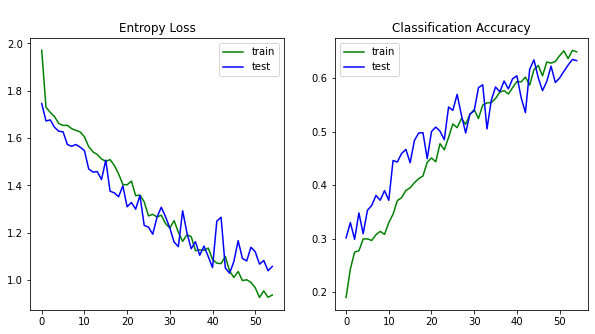

In [41]:
# Build graphs 
graph_accuracy_loss(history)

<h4>Trained for max 85 epochs and bigger size of pictures (224*224px instead 128*128px) and Early Stopping</h4>

In [42]:
# Implementing Early stoping and checkpoint to save the model with the highest accuracy
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
MC = ModelCheckpoint('best_model_224px.h5', monitor='val_accuracy', verbose=1, save_best_only=True, 
                     save_weights_only=False, mode='auto')

In [ ]:
# Let's try to change pictures size from 128 to 224px and check accuracy
# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

img_rows = 224
img_cols = 224
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model224 = model_with_dropout()
# Fit model
history = model224.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 85, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/85
53/53 [==============================] - 327s 6s/step - loss: 1.8328 - accuracy: 0.2140 - val_loss: 1.6944 - val_accuracy: 0.2639

Epoch 00001: val_accuracy improved from -inf to 0.26389, saving model to best_model_224px.h5
Epoch 2/85
53/53 [==============================] - 328s 6s/step - loss: 1.6909 - accuracy: 0.2965 - val_loss: 1.5895 - val_accuracy: 0.3778

Epoch 00002: val_accuracy improved from 0.26389 to 0.37778, saving model to best_model_224px.h5
Epoch 3/85
53/53 [==============================] - 327s 6s/step - loss: 1.6376 - accuracy: 0.3441 - val_loss: 1.5510 - val_accuracy: 0.4111

Epoch 00003: val_accuracy improved from 0.37778 to 0.41111, saving model to best_model_224px.h5
Epoch 4/85
53/53 [==============================] - 329s 6s/step - loss: 1.6085 - accuracy: 0.3495 - val_loss: 1.4963 - val_accuracy: 0.4500

Epoch 00004: val_accuracy improved from 0.41111 to 0.45000, sav

In [ ]:
# Create a new model instance to upload the best saved model there
# because our trained model finished training with the final accuracy not the best possible
model = model_with_dropout()

# Load the previously saved weights
model.load_weights('best_model_224px.h5')
# Evaluate model

_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

In [ ]:
# Build graphs
graph_accuracy_loss(history)

In [87]:
# As we see after 58 epochs our model didn't reached much higher level of accuracy 
# and because of the fact that calculations are computationally 
# expensive for bigger picture size we will continue with a model trained on small pictures of size 128*128
# as the difference in accuracy is almost neglectable:
# 0.63472 (for pictures with size 224px) against 0.63264 (for pictures with size 128px)

<h3>Model with 3 VGG blocks, dropout, data augmentation and batch normalization</h3>
<h4>Trained for 80 max epochs and small size of pictures (128*128px) with Early stopping</h4>

In [ ]:
# Implementing Early stoping
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=9)
MC = ModelCheckpoint('best_model_blocks_bn.h5', monitor='val_accuracy', 
                     verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [ ]:
# Let's try out a bit different architecture with VGG blocks

In [ ]:
# Define CNN model with added BatchNormalization
img_rows = 128
img_cols = 128
def model_blocks_bn():
    #reset_random_seeds()
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
   
   
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', name='fc1'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax', name='output'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model_bn = model_blocks_bn()
# Fit model
history = model_bn.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 80, callbacks=[ES, MC])

In [ ]:
# Create a new model instance to upload the best saved model there
# because our trained model finished training with the final accuracy not the best possible
model = model_blocks_bn()

# Load the previously saved weights
model.load_weights('best_model_blocks_bn.h5')
# Evaluate model

_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

In [ ]:
# Build graphs
graph_accuracy_loss(history)

In [ ]:
# As we see our more complex model didn't have higher accuracy so we will continiue with 
# a model trained on small pictures of size 128*128 - best_model.h5

<h3>Model VGG16</h3>

In [88]:
# Implementing Early stoping
ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=9)
MC = ModelCheckpoint('best_model_vgg16.h5', monitor='val_accuracy', 
                     verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
img_rows = 128
img_cols = 128
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(img_rows,img_cols,3),filters=64, kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
   
    model.add(Flatten(name='flatten'))
    model.add(Dense(units=4096, activation="relu", name='fc1'))
    model.add(Dense(units=4096,activation="relu", name='fc2'))
    model.add(Dense(units=6, activation='softmax', name='output'))
    
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [89]:
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model_vgg = VGG16()
# Fit model
history = model_vgg.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 75, callbacks=[ES, MC])

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/100
53/53 [==============================] - 512s 10s/step - loss: 1.7917 - accuracy: 0.1719 - val_loss: 1.7914 - val_accuracy: 0.2313

Epoch 00001: val_accuracy improved from -inf to 0.23125, saving model to best_model_vgg16.h5
Epoch 2/100
53/53 [==============================] - 518s 10s/step - loss: 1.7914 - accuracy: 0.2089 - val_loss: 1.7910 - val_accuracy: 0.2896

Epoch 00002: val_accuracy improved from 0.23125 to 0.28958, saving model to best_model_vgg16.h5
Epoch 3/100
53/53 [==============================] - 537s 10s/step - loss: 1.7910 - accuracy: 0.2392 - val_loss: 1.7907 - val_accuracy: 0.2076

Epoch 00003: val_accuracy did not improve from 0.28958
Epoch 4/100
53/53 [==============================] - 521s 10s/step - loss: 1.7907 - accuracy: 0.2368 - val_loss: 1.7904 - val_accuracy: 0.2771

Epoch 00004: val_accuracy did not improve from 0.28958
Epoch 5/100
53/53 [======================

KeyboardInterrupt: 

In [ ]:
# Create a new model instance to upload the best saved model there
# because our trained model finished training with the final accuracy not the best possible
model = VGG16()

# Load the previously saved weights
model.load_weights('best_model_vgg16.h5')

# Evaluate model

_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

In [ ]:
# Build graphs
graph_accuracy_loss(history)